<a href="https://colab.research.google.com/github/stherzada/TrabalhosEmIpynb/blob/main/Classificacaodefaces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


#Configuração inicial

import cv2 #OpenCV


import dlib #Dlib - Aprendizado de máquina e análise de dados


%matplotlib inline 
from matplotlib import pyplot as plt #Biblioteca para trabalhar com gráficos
import pylab #Controla o tamanho das imagens
pylab.rcParams['figure.figsize'] = (10.0,8.0) #Tamanho das imagens do notebook
import seaborn #Melhora a qualidade dos gráficos
import numpy as np #Manipulação da Matriz

In [ ]:
from os import listdir, path, makedirs
from os.path import isfile, join

import shutil
from sklearn.metrics import accuracy_score

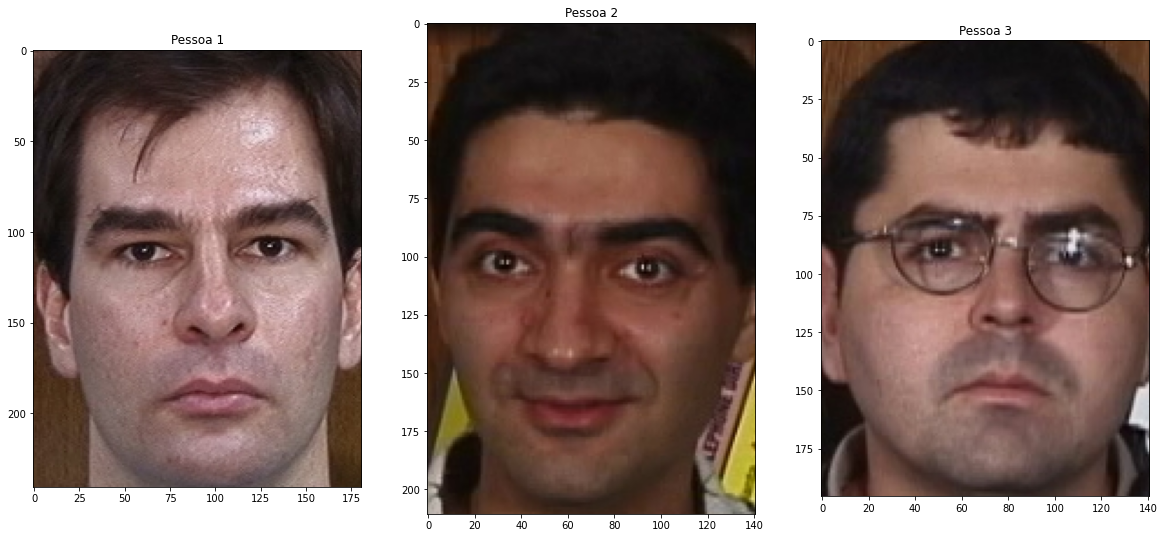

In [ ]:
#Verificando as imagens do dataset

imagem_face_1 = cv2.imread("imagens/cropped_faces/s01_01.jpg")
imagem_face_1 = cv2.cvtColor(imagem_face_1, cv2.COLOR_BGR2RGB)

imagem_face_2 = cv2.imread("imagens/cropped_faces/s02_01.jpg")
imagem_face_2 = cv2.cvtColor(imagem_face_2, cv2.COLOR_BGR2RGB)

imagem_face_3 = cv2.imread("imagens/cropped_faces/s03_01.jpg")
imagem_face_3 = cv2.cvtColor(imagem_face_3, cv2.COLOR_BGR2RGB)


plt.figure(figsize=(20,10))
plt.subplot (131)
plt.title("Pessoa 1")
plt.imshow(imagem_face_1)


plt.subplot (132)
plt.title("Pessoa 2")
plt.imshow(imagem_face_2)


plt.subplot (133)
plt.title("Pessoa 3")
plt.imshow(imagem_face_3)

plt.show()

In [ ]:
faces_caminho = "imagens/cropped_faces/"
lista_arq_faces=[f for f in listdir(faces_caminho) 
if isfile(join(faces_caminho, f )) ]



In [ ]:
lista_arq_faces[55]

's17_11.jpg'

In [ ]:
len(lista_arq_faces)

750

In [ ]:
# Separação de imagens de teste e treino

faces_path_treino="imagens/treino/"
faces_path_teste="imagens/teste/"

if not path.exists(faces_path_treino):
  makedirs(faces_path_treino)

if not path.exists(faces_path_teste):
  makedirs(faces_path_teste)


#SEPARAR 10 IMAGENS PARA TREINO E 5 PARA TESTES
for arq in lista_arq_faces:
  sujeito=arq[1:3]
  numero=arq[4:6]

  if int (numero) <= 10:
    shutil.copyfile(faces_caminho + arq, faces_path_treino + arq)
  else:
    shutil.copyfile(faces_caminho + arq, faces_path_teste + arq)

In [ ]:
def padronizar_imagem(imagem_caminho):
  imagem=cv2.imread(imagem_caminho, cv2.IMREAD_GRAYSCALE)
  imagem=cv2.resize(imagem, (200,200), interpolation=cv2.INTER_LANCZOS4)
  return imagem


In [ ]:
list_faces_treino = [f for f in listdir(faces_path_treino) 
if isfile(join(faces_path_treino,f))]

list_faces_teste = [f for f in listdir(faces_path_teste) 
if isfile(join(faces_path_teste,f))]

In [ ]:
dados_treinamento, sujeitos= [],[]

In [ ]:
for i, arq in enumerate(list_faces_treino):
  imagem_path= faces_path_treino + arq
  imagem = padronizar_imagem(imagem_path)
  dados_treinamento.append(imagem)
  sujeito = arq[1:3]
  sujeitos.append(int(sujeito))

In [ ]:
dados_teste, sujeitos_teste= [],[]

In [ ]:
for i, arq in enumerate(list_faces_teste):
  imagem_path= faces_path_teste + arq
  imagem = padronizar_imagem(imagem_path)
  dados_teste.append(imagem)
  sujeito = arq[1:3]
  sujeitos_teste.append(int(sujeito))

In [ ]:
sujeitos = np.asarray(sujeitos, dtype=np.int32)
sujeitos_teste = np.asarray(sujeitos, dtype=np.int32)

In [ ]:
modelo_eingenfaces=cv2.face.EigenFaceRecognizer_create()

In [ ]:
modelo_eingenfaces.train(dados_treinamento,sujeitos)

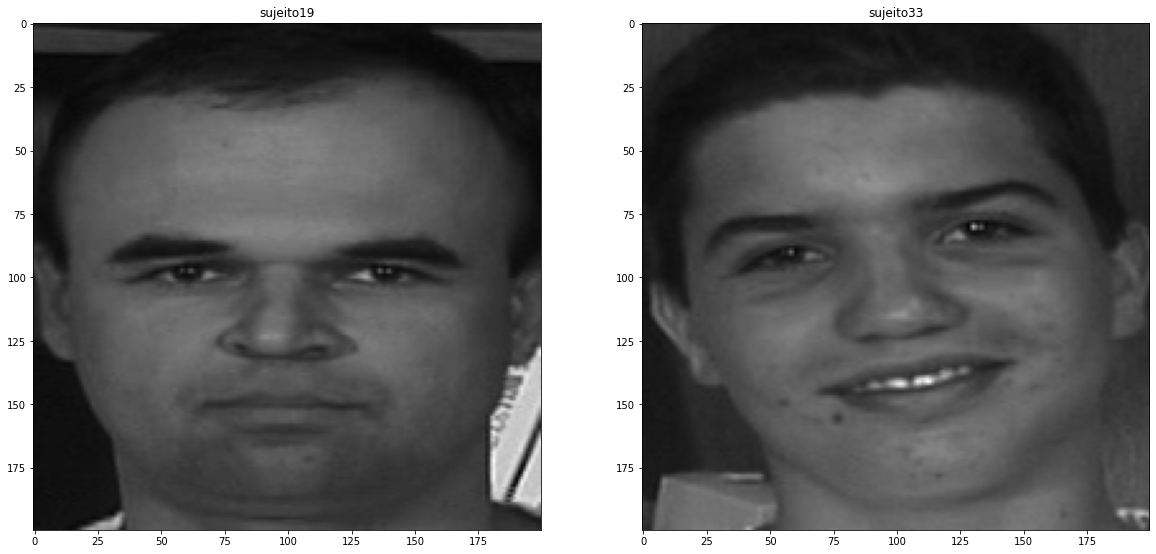

In [ ]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.title("sujeito"+ str(sujeitos_teste[15]))
plt.imshow(dados_teste[15], cmap="gray")

plt.subplot(122)
plt.title("sujeito"+ str(sujeitos_teste[45]))
plt.imshow(dados_teste[45], cmap="gray")

plt.show()

In [ ]:
predicao = modelo_eingenfaces.predict(dados_teste[15])
predicao

(22, 3836.7234409003277)